In [1]:
import sys
import os as so
import pathlib as pl
import matplotlib.pyplot as pt
from itertools import islice
from torch.nn.functional import one_hot
from torchvision.utils import make_grid as grid

In [2]:
# Add local package in path of notebook
package = str(pl.Path(so.getcwd(), '..'))
[lambda: sys.path.append(package), lambda: None][package not in sys.path]()

# Local package imports
from gic import *
from gic.data.utils import load_batched_data
from gic.data.transform import AugmentTransform, RobustAugmentTransform

Seed set to 10030


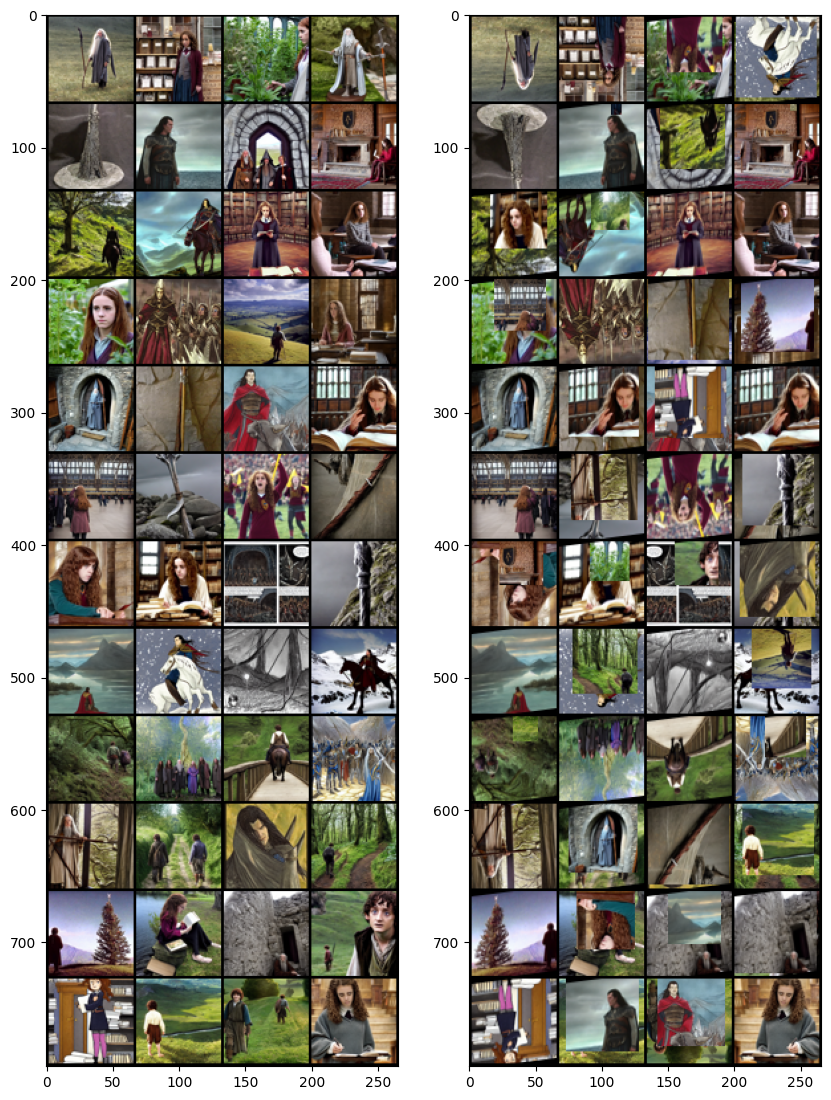

In [4]:
# Lazy load data
batches = 3
batch_size = 16
train_dl, valid_dl, test_dl = load_batched_data('..' / DATA_PATH, 'disjoint', gen_torch, batch_size=batch_size * batches)

# Apply transforms on train data
data_iter = iter(train_dl)
transform = RobustAugmentTransform()
data_raw = next(data_iter)
data_aug = transform(*data_raw)

# Show comparison between raw & augmented
f, ax = pt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(grid(data_raw[0], nrow=4).permute((1, 2, 0)))
ax[1].imshow(grid(data_aug[0], nrow=4).permute((1, 2, 0)))
pt.show()